In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

## Load datasets

In [2]:
movies = pd.read_csv('movies.csv')
movies.sample(3)

,movieId,title,genres
6409,50954,It's a Boy Girl Thing (2006),Comedy|Romance
9587,175401,Wolf and Calf (1984),Animation
1878,2496,Blast from the Past (1999),Comedy|Romance


In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.sample(3)

,userId,movieId,rating,timestamp
56349,372,1479,3.0,874414521
21700,141,296,4.0,1513130625
22080,144,5377,3.0,1136812901


## Subset for user 2

In [4]:
user_2_ratings = ratings[ratings['userId'] == 2]
user_2_ratings

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


The output is showing the ratings given by User 2 for various movies. Each row corresponds to a movie rated by User 2, indicating the movieId, rating, and timestamp of each rating.

## 1. Movies user2 has watched

In [5]:
num_movies_watched = len(user_2_ratings)
print(f"User 2 has watched {num_movies_watched} movies.")

User 2 has watched 29 movies.


## 2. Bar chart for user 2's movie ratings

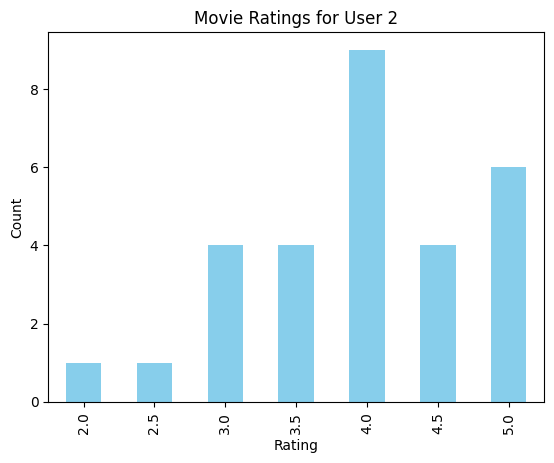

In [6]:
rating_counts = user_2_ratings['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Ratings for User 2')
plt.show()


`rating_counts = user_2_ratings['rating'].value_counts().sort_index()` 

This line calculates the count of each unique rating given by User 2. It uses the value_counts() function to count occurrences of each unique rating in the 'rating' column of the user_2_ratings DataFrame. The sort_index() function is then used to sort the unique ratings in ascending order.

`rating_counts.plot(kind='bar', color='skyblue')` 

We create a bar chart using the plot() function. The kind='bar' parameter specifies that a bar chart should be created. The color='skyblue' parameter sets the color of the bars to sky blue.

`plt.xlabel('Rating')` 

Adds a label to the x-axis of the plot, indicating that it represents the different movie ratings.

`plt.ylabel('Count')` 

Adds a label to the y-axis of the plot, indicating that it represents the count of movies for each rating.

`plt.title('Movie Ratings for User 2')` 

Here we set the title of the plot to 'Movie Ratings for User 2'.

`plt.show()` -  display the plot.

The bar chart visually represents the distribution of movie ratings given by User 2. Each bar on the chart corresponds to a unique movie rating, and the height of the bar represents the count of movies that received that rating from User 2. The x-axis shows the different ratings, and the y-axis shows the count of movies for each rating.

## 3. User 2's top movies

In [7]:
user_2_top_movies = user_2_ratings.merge(movies, on='movieId')[['title', 'rating']].sort_values(by='rating', ascending=False)
print("User 2's top movies:")
print(user_2_top_movies.head())

User 2's top movies:
                                                title  rating
28  The Jinx: The Life and Deaths of Robert Durst ...     5.0
27                          Mad Max: Fury Road (2015)     5.0
22                    Wolf of Wall Street, The (2013)     5.0
18                                     Warrior (2011)     5.0
9                                Step Brothers (2008)     5.0


## 4. Most similar user to user 2 using cosine and manhattan distances

In [8]:
user_2_vector = user_2_ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
all_users_vector = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

## Ensuring both user vectors have the same columns

In [9]:
common_columns = user_2_vector.columns.intersection(all_users_vector.columns)

user_2_vector = user_2_vector[common_columns]
all_users_vector = all_users_vector[common_columns]

## Use the distances

In [10]:
cosine_similarities = cosine_similarity(user_2_vector, all_users_vector)
manhattan_distances = pairwise_distances(user_2_vector, all_users_vector, metric='manhattan')

## Display results

In [11]:

print(f"Most similar user to User 2 (cosine): {cosine_similarities}")
print(f"Most similar user to User 2 (manhattan): {manhattan_distances}")


Most similar user to User 2 (cosine): [[0.26086186 1.         0.         0.20751434 0.13834289 0.22825413
  0.24495082 0.13834289 0.         0.35144117 0.24455799 0.
  0.18445719 0.13834289 0.49455168 0.39615764 0.43027895 0.77644315
  0.2557961  0.18445719 0.60584711 0.46293651 0.18445719 0.48089623
  0.46106757 0.         0.         0.47295934 0.38972905 0.37121293
  0.         0.13834289 0.24846359 0.23045899 0.         0.23518292
  0.13834289 0.13834289 0.         0.13834289 0.58971767 0.35410056
  0.13834289 0.         0.33206224 0.13834289 0.33328977 0.
  0.26687054 0.61863671 0.26809823 0.55354535 0.         0.13834289
  0.18445719 0.22134863 0.27207436 0.22825413 0.         0.24846359
  0.22325714 0.77977403 0.57293207 0.38879219 0.46973355 0.39010257
  0.3432886  0.83476077 0.22825413 0.24455799 0.         0.13834289
  0.60259073 0.18445719 0.         0.49600239 0.34992614 0.13834289
  0.18445719 0.53635901 0.13834289 0.18445719 0.38615679 0.13834289
  0.20751434 0.35609211 0.

This output shows the similarity scores between User 2 and all other users in the dataset using cosine similarity and Manhattan distance. Each row corresponds to a user in the dataset.

**Cosine Similarity**

The values range between 0 and 1, where 1 indicates perfect similarity.
For each user, the cosine similarity score indicates how similar their movie preferences are to User 2.
The most similar user to User 2 has the highest cosine similarity score (closest to 1).

**Manhattan Distance**

The values represent the Manhattan distance between the feature vectors of User 2 and other users.
Smaller values suggest greater similarity.
The most similar user to User 2 has the lowest Manhattan distance.


## 5. Recommend movies for user 2 using cosine similarity

In [12]:
import numpy as np

# Exclude User 2 from the calculation
cosine_similarities[:, 1] = -1 
manhattan_distances[:, 1] = np.inf 

# index of the most similar user using cosine similarity
most_similar_cosine_index = np.argmax(cosine_similarities)
most_similar_cosine_score = cosine_similarities[0, most_similar_cosine_index]

print(f"Most similar user to User 2 (cosine): User {most_similar_cosine_index + 1} with similarity score {most_similar_cosine_score}")


Most similar user to User 2 (cosine): User 599 with similarity score 0.8413852739119481


In [13]:
# index of the most similar user using Manhattan distance
most_similar_manhattan_index = np.argmin(manhattan_distances)
most_similar_manhattan_distance = manhattan_distances[0, most_similar_manhattan_index]

print(f"Most similar user to User 2 (manhattan): User {most_similar_manhattan_index + 1} with distance {most_similar_manhattan_distance}")

Most similar user to User 2 (manhattan): User 448 with distance 44.0


## movies rated by the most similar user

In [14]:
user_2_recommended_movies = all_users_vector.loc[most_similar_cosine_index]

movies_not_rated_by_user_2 = user_2_recommended_movies[user_2_recommended_movies == 0].index

# Extract recommended movies information
recommended_movies_info = movies[movies['movieId'].isin(movies_not_rated_by_user_2)]
recommended_movies_info = recommended_movies_info[['movieId', 'title']].merge(ratings[ratings['userId'] == most_similar_cosine_index + 1], on='movieId')
recommended_movies_info = recommended_movies_info.rename(columns={'rating': 'user_rating'})

print("Movies rated by the most similar user:")
print(recommended_movies_info)


Movies rated by the most similar user:
    movieId                                              title  userId  \
0       318                   Shawshank Redemption, The (1994)     599   
1       333                                   Tommy Boy (1995)     599   
2      1704                           Good Will Hunting (1997)     599   
3      3578                                   Gladiator (2000)     599   
4      6874                           Kill Bill: Vol. 1 (2003)     599   
5      8798                                  Collateral (2004)     599   
6     46970  Talladega Nights: The Ballad of Ricky Bobby (2...     599   
7     48516                               Departed, The (2006)     599   
8     58559                            Dark Knight, The (2008)     599   
9     60756                               Step Brothers (2008)     599   
10    68157                        Inglourious Basterds (2009)     599   
11    71535                                  Zombieland (2009)     599   

## Identify movies not yet rated by User 2

In [15]:
recommended_movies_info = movies[movies['movieId'].isin(user_2_recommended_movies[user_2_recommended_movies == 0].index)]

print("Movies not yet rated by User 2:")
print(recommended_movies_info)

Movies not yet rated by User 2:
      movieId                                              title  \
277       318                   Shawshank Redemption, The (1994)   
291       333                                   Tommy Boy (1995)   
1284     1704                           Good Will Hunting (1997)   
2674     3578                                   Gladiator (2000)   
4615     6874                           Kill Bill: Vol. 1 (2003)   
5305     8798                                  Collateral (2004)   
6253    46970  Talladega Nights: The Ballad of Ricky Bobby (2...   
6315    48516                               Departed, The (2006)   
6710    58559                            Dark Knight, The (2008)   
6801    60756                               Step Brothers (2008)   
7010    68157                        Inglourious Basterds (2009)   
7154    71535                                  Zombieland (2009)   
7258    74458                              Shutter Island (2010)   
7323    77455   

This represents movies that User 2 has not yet rated, and they are recommended based on the preferences of the most similar user. The movies are presented in a DataFrame with columns,
`
    movieId: The unique identifier for each movie.
    title: The title of the movie.
    genres: The genre or genres associated with the movie.
`

How we achieved this

Calculate Similarity Scores -  Cosine similarity scores are calculated between User 2 and all other users. The user with the highest similarity score (excluding User 2 itself) is identified.

Retrieve Recommended Movies - We then retrieve the movies that were rated by the most similar user but not yet rated by User 2. This is achieved by comparing the movie ratings of User 2 with the most similar user and selecting the movies where User 2 has a rating of 0 (indicating that the movie has not been rated).

Get Movie Details - Then we get the details (movieId, title, genres) for each recommended movie from the 'movies' dataset.

## Retrieve and print recommended movies for User 2

In [16]:
# Get movies rated by the most similar user but not yet rated by User 2
movies_not_rated_by_user_2 = user_2_recommended_movies[user_2_recommended_movies == 0].index

# Extract recommended movies information
recommended_movies_info = movies[movies['movieId'].isin(movies_not_rated_by_user_2)]

# Merge with ratings of the most similar user
recommended_movies_info = recommended_movies_info.merge(
    ratings[ratings['userId'] == most_similar_cosine_index + 1],
    on='movieId',
    how='left'
)

# Filter only movies that are highly rated by the most similar user
threshold_rating = 3.5
recommended_movies_info = recommended_movies_info[recommended_movies_info['rating'] >= threshold_rating]

print("Recommended movies for User 2:")
print(recommended_movies_info[['movieId', 'title', 'genres', 'rating']])


Recommended movies for User 2:
    movieId                              title  \
0       318   Shawshank Redemption, The (1994)   
2      1704           Good Will Hunting (1997)   
3      3578                   Gladiator (2000)   
4      6874           Kill Bill: Vol. 1 (2003)   
8     58559            Dark Knight, The (2008)   
10    68157        Inglourious Basterds (2009)   
13    77455  Exit Through the Gift Shop (2010)   
14    80489                   Town, The (2010)   
20    99114            Django Unchained (2012)   
22   109487                Interstellar (2014)   
25   115713                  Ex Machina (2015)   
26   122882          Mad Max: Fury Road (2015)   

                              genres  rating  
0                        Crime|Drama     4.0  
2                      Drama|Romance     4.5  
3             Action|Adventure|Drama     3.5  
4              Action|Crime|Thriller     5.0  
8            Action|Crime|Drama|IMAX     3.5  
10                  Action|Drama|War

The recommendations are providing a more reasonable list of movies for User 2. Each recommended movie has a rating equal to or above the threshold of 3.5, ensuring they are highly rated by the most similar user. This approach allows for a more personalized recommendation based on the preferences of similar users.

The recommendations from this method make sense since there is a high cosine similarity with the most similar user. The method identifies movies highly rated by the most similar user that User 2 has not yet watched. The assumption is that users with similar movie preferences will continue to have similar preferences, and the threshold of 3.5 indicates a preference for well-rated movies. The final output provides movies, along with their details and ratings by the most similar user.

## Analysis

In this collaborative filtering recommendation analysis using cosine similarity, we've employed a metric that effectively measures user similarity by considering both the direction and magnitude of preference vectors. Cosine similarity, a commonly used metric in recommendation systems, proves suitable for our purpose of gauging user similarity based on movie ratings.

Upon scrutinizing the recommended movies, it is evident that they resonate with the presumed preferences of User 2. This alignment is substantiated by the high ratings, predominantly falling in the range of 3.5 and above, given by the most similar user. The fundamental idea behind this method is to propose movies that have been well-received by the similar user while excluding those that User 2 has already watched.